# Web Scrapper Race

## global imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.reset() 

# Beautifulsoup

<img src="https://www.crummy.com/software/BeautifulSoup/bs4/doc/_images/6.1.jpg"
     width="200"
     alt="bs4!"
     style="float: left; margin-center: 10px;">

## imports

In [2]:
from bs4 import BeautifulSoup
import requests

## init

In [3]:
initialize_bs4 = True

## functions for bs4

In [4]:
if initialize_bs4 is True:

    def retrieve_titles_bs4(soup):
        warning = soup.find('div', class_="alert alert-warning")
        book_container = warning.nextSibling.nextSibling
        titles = [
            h3.find('a').attrs['title'] for h3 in book_container.findAll('h3')
        ]
        return titles

    def retrieve_prices_bs4(soup):
        warning = soup.find('div', class_="alert alert-warning")
        book_container = warning.nextSibling.nextSibling
        prices = [
            float(p.text[1:])
            for p in book_container.findAll('p', class_="price_color")
        ]  # Removing the pound sign and converting to float
        return prices

    def retrieve_availabilities_bs4(soup):
        warning = soup.find('div', class_="alert alert-warning")
        book_container = warning.nextSibling.nextSibling
        avails = [
            a.text.strip()
            for a in book_container.findAll('p', class_="instock availability")
        ]
        return avails

## raw code

raw code:
```python
if initialize_bs4 is True:
    start = dt.datetime.now()
    html_page = requests.get('http://books.toscrape.com/'
                             )  # Make a get request to retrieve the page
    soup = BeautifulSoup(
        html_page.content,
        'html.parser')  # Pass the page contents to beautiful soup for parsing
    
    df_bs4 = pd.DataFrame()
    for i in range(1, 5):
        url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
        html_page = requests.get(url)
        soup = BeautifulSoup(html_page.content, 'html.parser')
        warning = soup.find('div', class_="alert alert-warning")
        book_container = warning.nextSibling.nextSibling
        df_bs4_temp = pd.DataFrame([
            retrieve_titles_bs4(soup),
            retrieve_prices_bs4(soup),
            retrieve_availabilities_bs4(soup)
        ]).transpose()
        df_bs4_temp.columns = ['Title', 'Price_(pounds)', 'Availability']
        df_bs4 = df_bs4.append(df_bs4_temp)
    df_bs4.reset_index().drop(columns=['index'])
    end = dt.datetime.now()
    time_ = end - start
    print(time_)
df_bs4

```

## functions for test

In [5]:
# as function
def bs4_run(start, end):
    if initialize_bs4 is True:
        start_ = dt.datetime.now()
        html_page = requests.get('http://books.toscrape.com/'
                                 )  # Make a get request to retrieve the page
        soup = BeautifulSoup(
            html_page.content,
            'html.parser')  # Pass the page contents to beautiful soup for parsing

        df_bs4 = pd.DataFrame()
        for i in range(start, end):
            url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
            html_page = requests.get(url)
            soup = BeautifulSoup(html_page.content, 'html.parser')
            warning = soup.find('div', class_="alert alert-warning")
            book_container = warning.nextSibling.nextSibling
            df_bs4_temp = pd.DataFrame([
                retrieve_titles_bs4(soup),
                retrieve_prices_bs4(soup),
                retrieve_availabilities_bs4(soup)
            ]).transpose()
            df_bs4_temp.columns = ['Title', 'Price_(pounds)', 'Availability']
            df_bs4 = df_bs4.append(df_bs4_temp)
        df_bs4.reset_index().drop(columns=['index'])
        end_ = dt.datetime.now()
        time_ = end_ - start_
    print(time_)
    return time_

In [6]:
# for getting exucution time
def test_bs4(times,start, end):
    test_time=times
    run_ = 0
    time_list = []
    while run_<=test_time:
        time_ = bs4_run(start, end)
        time_list.append(time_.total_seconds())
        run_ +=1
    return time_list

## test

In [7]:
bs4_list = test_bs4(30,1,20)
bs4_list

0:00:22.588909
0:00:21.081076
0:00:17.608823
0:00:21.054067
0:00:21.119570
0:00:19.263121
0:00:20.861941
0:00:20.641224
0:00:18.560842
0:00:20.989659
0:00:20.453591
0:00:18.496910
0:00:21.024091
0:00:22.851801
0:00:19.739495
0:00:23.105616
0:00:22.655524
0:00:18.639519
0:00:23.997596
0:00:29.213100
0:00:20.350744
0:00:22.855720
0:00:20.417156
0:00:20.113169
0:00:29.014841
0:00:18.275746
0:00:22.247247
0:00:25.984755
0:00:19.805578
0:00:22.899694
0:00:21.680533


[22.588909,
 21.081076,
 17.608823,
 21.054067,
 21.11957,
 19.263121,
 20.861941,
 20.641224,
 18.560842,
 20.989659,
 20.453591,
 18.49691,
 21.024091,
 22.851801,
 19.739495,
 23.105616,
 22.655524,
 18.639519,
 23.997596,
 29.2131,
 20.350744,
 22.85572,
 20.417156,
 20.113169,
 29.014841,
 18.275746,
 22.247247,
 25.984755,
 19.805578,
 22.899694,
 21.680533]

# Selenium 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Selenium_Logo.png/1024px-Selenium_Logo.png "
     width="200"
     alt="bs4!"
     style="float: left; margin-center: 10px;">

## packages

In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

## init

In [9]:
initialize_selenium = True

## raw code

raw code:
```python
if initialize_selenium is True:
        start = dt.datetime.now()
        # initializing webdriver
        opts = Options()
        opts.headless = True
        driver = webdriver.Chrome(options=opts,
                                  executable_path=r'./assets/chromedriver.exe')
        # connection to webpage
        base_url_string = 'http://books.toscrape.com/catalogue/page-'
        # selecting pages to get
        list_of_pages = np.arange(start, end, 1)
        df_sel = pd.DataFrame()
        for im in list_of_pages:
            url = f'{base_url_string}{im}.html'
            driver.get(url)
            names = [
                x.find_element_by_tag_name('h3').find_element_by_tag_name(
                    'a').get_attribute('title')
                for x in driver.find_elements_by_class_name('product_pod')
            ]

            prices = [
                x.find_element_by_class_name('price_color').text[1:]
                for x in driver.find_elements_by_class_name('product_pod')
            ]
            availabilities = [
                x.find_element_by_class_name('product_price').text.split("\n")
                [1] for x in driver.find_elements_by_class_name('product_pod')
            ]
            df_sel_temp = pd.DataFrame([names, prices,
                                        availabilities]).transpose()
            df_sel_temp.columns = ['Title', 'Price_(pounds)', 'Availability']
            df_sel = df_sel.append(df_sel_temp)
        df_sel.reset_index().drop(columns=['index'])
        end = dt.datetime.now()
        time_ = end - start
    print(time_)
    df_sel
```

## functions

In [10]:
# as function
def Selenium_run(start, end):
    if initialize_selenium is True:
        start_ = dt.datetime.now()
        # initializing webdriver
        opts = Options()
        opts.headless = True
        driver = webdriver.Chrome(options=opts,
                                  executable_path=r'./assets/chromedriver.exe')
        # connection to webpage
        base_url_string = 'http://books.toscrape.com/catalogue/page-'
        # selecting pages to get
        list_of_pages = np.arange(start, end, 1)
        df_sel = pd.DataFrame()
        for im in list_of_pages:
            url = f'{base_url_string}{im}.html'
            driver.get(url)
            names = [
                x.find_element_by_tag_name('h3').find_element_by_tag_name(
                    'a').get_attribute('title')
                for x in driver.find_elements_by_class_name('product_pod')
            ]

            prices = [
                x.find_element_by_class_name('price_color').text[1:]
                for x in driver.find_elements_by_class_name('product_pod')
            ]
            availabilities = [
                x.find_element_by_class_name('product_price').text.split("\n")
                [1] for x in driver.find_elements_by_class_name('product_pod')
            ]
            df_sel_temp = pd.DataFrame([names, prices,
                                        availabilities]).transpose()
            df_sel_temp.columns = ['Title', 'Price_(pounds)', 'Availability']
            df_sel = df_sel.append(df_sel_temp)
        df_sel.reset_index().drop(columns=['index'])
        end_ = dt.datetime.now()
        time_ = end_ - start_
    print(time_)
    return time_

In [11]:
# for getting exucution time
def test_sel(times,start, end):
    test_time=times
    run_ = 0
    time_list = []
    while run_<=test_time:
        time_ = Selenium_run(start, end)
        time_list.append(time_.total_seconds())
        run_ +=1
    return time_list

## test

In [13]:
sel_list = test_sel(30,1,20)
sel_list

0:00:51.334402
0:01:02.317860
0:03:17.038535
0:00:55.254649
0:00:49.442724
0:00:49.789736
0:00:50.113776
0:00:50.135767
0:00:58.860401
0:00:51.230949
0:00:49.747855
0:00:49.515545
0:00:49.304461
0:00:58.228742
0:00:51.518835
0:00:50.866223
0:00:51.522425
0:00:48.949292
0:01:12.208364
0:00:50.894801
0:00:50.653783
0:00:50.632849
0:00:50.168124
0:00:49.176981
0:00:59.253186
0:00:50.887206
0:00:49.048478
0:00:50.226703
0:00:48.817249
0:00:48.849489
0:01:01.081267


[51.334402,
 62.31786,
 197.038535,
 55.254649,
 49.442724,
 49.789736,
 50.113776,
 50.135767,
 58.860401,
 51.230949,
 49.747855,
 49.515545,
 49.304461,
 58.228742,
 51.518835,
 50.866223,
 51.522425,
 48.949292,
 72.208364,
 50.894801,
 50.653783,
 50.632849,
 50.168124,
 49.176981,
 59.253186,
 50.887206,
 49.048478,
 50.226703,
 48.817249,
 48.849489,
 61.081267]

# Scrapy Hack

<img src="https://github.com/scrapy/scrapy/blob/2.4/artwork/scrapy-logo.jpg?raw=true "
     width="200"
     alt="bs4!"
     style="float: left; margin-center: 10px;">

## packages

In [26]:
import scrapy
import requests
from scrapy.http import TextResponse

## init

In [27]:
initialize_scrapy = True

## raw code

raw code:
```python
if initialize_scrapy is True:
    start = dt.datetime.now()
    base_url = 'http://books.toscrape.com/catalogue/page-'
    df_sc = pd.DataFrame()
    for i in np.arange(1, 2, 1):
        url = base_url + str(i) + '.html'
        r = requests.get(url)
        response = TextResponse(r.url, body=r.text, encoding='utf-8')
        title = response.css("h3>a::attr(title)").extract()
        price = [
            x[2:] for x in response.css(
                "div[class='product_price']>p[class='price_color']::text").
            extract()
        ]
        avail = [
            x.split('\n')[3].replace(" ", "") for x in response.css(
                "div[class='product_price']>p[class='instock availability']").
            extract()
        ]
        df_sc_temp = pd.DataFrame([title, price, avail]).transpose()
        df_sc_temp.columns = ['Title', 'Price_(pounds)', 'Availability']
        df_sc = df_sc.append(df_sc_temp)
    end = dt.datetime.now()
    time_ = end - start
    print(time_)
    df_sc
```

## functions

In [28]:
def sc_run(start, end):
    if initialize_scrapy is True:
        start = dt.datetime.now()
        base_url = 'http://books.toscrape.com/catalogue/page-'
        df_sc = pd.DataFrame()
        for i in np.arange(start, end, 1):
            url = base_url + str(i) + '.html'
            r = requests.get(url)
            response = TextResponse(r.url, body=r.text, encoding='utf-8')
            title = response.css("h3>a::attr(title)").extract()
            price = [
                x[2:] for x in response.css(
                    "div[class='product_price']>p[class='price_color']::text").
                extract()
            ]
            avail = [
                x.split('\n')[3].replace(" ", "") for x in response.css(
                    "div[class='product_price']>p[class='instock availability']"
                ).extract()
            ]
            df_sc_temp = pd.DataFrame([title, price, avail]).transpose()
            df_sc_temp.columns = ['Title', 'Price_(pounds)', 'Availability']
            df_sc = df_sc.append(df_sc_temp)
        end = dt.datetime.now()
        time_ = end - start
        print(time_)
        return time_

In [30]:
# for getting exucution time
def test_sc(times,start, end):
    test_time=times
    run_ = 0
    time_list = []
    while run_<=test_time:
        time_ = sc_run(start, end)
        time_list.append(time_.total_seconds())
        run_ +=1
    return time_list

## test 

In [31]:
sc_list = test_sc(30,1,20)
sc_list

0:00:14.023608
0:00:19.832731
0:00:29.141474
0:00:14.298718
0:00:19.956682
0:00:28.649661
0:00:16.981202
0:00:13.947175
0:00:28.380820
0:00:15.171341
0:00:18.465039
0:00:28.600817
0:00:16.839148
0:00:23.535996
0:00:22.502272
0:00:20.426757
0:00:34.506726
0:00:16.614674
0:00:19.047138
0:00:24.072060
0:00:16.011762
0:00:22.357766
0:00:26.134986
0:00:20.119217
0:00:24.936586
0:00:21.108756
0:00:19.492593
0:00:32.141590
0:00:17.909364
0:00:19.417362
0:00:24.839079


[14.023608,
 19.832731,
 29.141474,
 14.298718,
 19.956682,
 28.649661,
 16.981202,
 13.947175,
 28.38082,
 15.171341,
 18.465039,
 28.600817,
 16.839148,
 23.535996,
 22.502272,
 20.426757,
 34.506726,
 16.614674,
 19.047138,
 24.07206,
 16.011762,
 22.357766,
 26.134986,
 20.119217,
 24.936586,
 21.108756,
 19.492593,
 32.14159,
 17.909364,
 19.417362,
 24.839079]

# Results

In [70]:
df = pd.DataFrame([bs4_list, sel_list, sc_list]).transpose()
df.columns = ['bs4', 'Selenium', 'Scrapy']
df

,bs4,Selenium,Scrapy
0,22.588909,51.334402,14.023608
1,21.081076,62.317860,19.832731
2,17.608823,197.038535,29.141474
3,21.054067,55.254649,14.298718
4,21.119570,49.442724,19.956682
5,19.263121,49.789736,28.649661
6,20.861941,50.113776,16.981202
7,20.641224,50.135767,13.947175
8,18.560842,58.860401,28.380820
9,20.989659,51.230949,15.171341


In [71]:
df.to_csv('./assets/race.csv', index=False)

In [72]:
df.describe().style.background_gradient(axis=1,cmap='PRGn')

,bs4,Selenium,Scrapy
count,31.000000,31.000000,31.000000
mean,21.535215,57.324860,21.595584
std,2.730108,26.458774,5.453435
min,17.608823,48.817249,13.947175
25%,19.959373,49.631700,17.445283
50%,21.024091,50.653783,20.119217
75%,22.753662,53.388537,24.887833
max,29.213100,197.038535,34.506726


In [73]:
df.mean()

bs4         21.535215
Selenium    57.324860
Scrapy      21.595584
dtype: float64

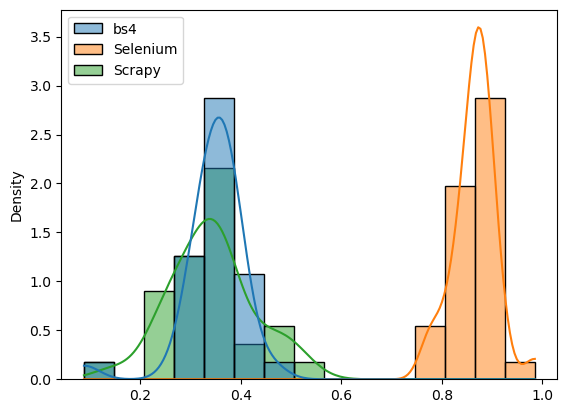

In [103]:
sns.histplot(data=df, bins=15, stat='density', kde=True);

In [76]:
from sklearn import preprocessing

In [78]:
normalized = preprocessing.normalize(df)

In [79]:
df= pd.DataFrame(normalized, columns = ['bs4', 'Selenium', 'Scrapy'])
df

,bs4,Selenium,Scrapy
0,0.390735,0.887966,0.242576
1,0.306806,0.906950,0.288638
2,0.088062,0.985396,0.145737
3,0.346089,0.908282,0.235044
4,0.368265,0.862140,0.347988
5,0.317937,0.821777,0.472861
6,0.366792,0.881093,0.298561
7,0.368700,0.895542,0.249129
8,0.273234,0.866483,0.417793
9,0.365641,0.892446,0.264286


In [85]:
df.describe().style.background_gradient(axis=1,cmap='PRGn')

,bs4,Selenium,Scrapy
count,31.000000,31.000000,31.000000
mean,0.347069,0.866445,0.341841
std,0.061294,0.041348,0.083022
min,0.088062,0.772169,0.145737
25%,0.324614,0.848742,0.293599
50%,0.355941,0.871249,0.343392
75%,0.377942,0.889183,0.375509
max,0.460569,0.985396,0.522676


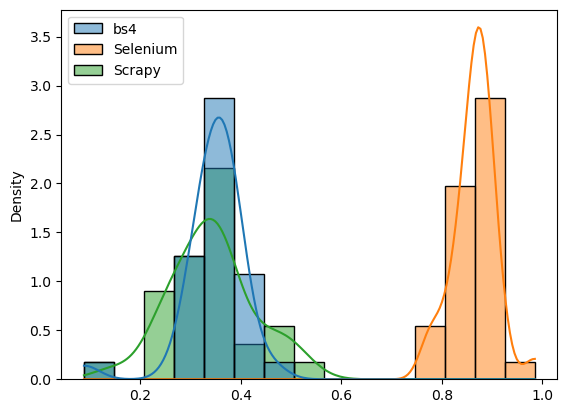

In [105]:
sns.histplot(data=df, bins=15, stat='density', kde=True);

# Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/300px-Pandas_logo.svg.png "
     width="200"
     alt="bs4!"
     style="float: left; margin-center: 10px;">

## from website

In [2]:
pd.read_html('http://books.toscrape.com/')

ValueError: No tables found

## from clipboard

In [5]:
pd.read_clipboard()

,A,Light,in,the,Attic
0,A,Light,in,the,...
1,£51.77,None,None,None,None
2,In,stock,None,None,None
3,Tipping,the,Velvet,None,None
4,Tipping,the,Velvet,None,None
5,£53.74,None,None,None,None
6,In,stock,None,None,None
7,Soumission,None,None,None,None
8,Soumission,None,None,None,None
9,£50.10,None,None,None,None


# Scrapy Framework

<img src="https://github.com/scrapy/scrapy/blob/2.4/artwork/scrapy-logo.jpg?raw=true "
     width="200"
     alt="bs4!"
     style="float: left; margin-center: 10px;">

## resources 

target website:
- http://books.toscrape.com/

In Jupyter Notebook:
- https://www.jitsejan.com/using-scrapy-in-jupyter-notebook.html
- https://www.upgrad.com/blog/use-scrapy-on-python-notebook/
- http://discuss.codingblocks.com/t/how-do-i-run-scrapy-class-from-jupyter-notebook/57689
- https://stackoverflow.com/questions/63200073/how-does-scrapy-works-on-jupyter-notebook
- https://www.mikulskibartosz.name/how-to-scrape-a-single-web-page-using-scrapy-in-jupyter-notebook/

Using Scrapy framework:
- https://www.youtube.com/watch?v=s4jtkzHhLzY
- https://towardsdatascience.com/a-minimalist-end-to-end-scrapy-tutorial-part-ii-b917509b73f7
- https://www.codementor.io/@mgalarny/using-scrapy-to-build-your-own-dataset-cz24hsbp5
- https://www.analyticsvidhya.com/blog/2017/07/web-scraping-in-python-using-scrapy/

Scraping:
- https://github.com/HrantDavtyan/Data_Scraping

Environment management
- https://towardsdatascience.com/environment-management-with-conda-python-2-3-b9961a8a5097

## packages

In [2]:
import scrapy
import requests
from scrapy.http import TextResponse
import re
from scrapy.crawler import CrawlerProcess
from scrapy.crawler import CrawlerRunner
from crochet import setup
setup()

## init

In [38]:
initialize_scrapy = False

## exploration

In [46]:
r = requests.get('http://books.toscrape.com/')
response = TextResponse(r.url, body=r.text, encoding='utf-8')

2021-03-31 20:05:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): books.toscrape.com:80
2021-03-31 20:05:59 [urllib3.connectionpool] DEBUG: http://books.toscrape.com:80 "GET / HTTP/1.1" 200 None


In [55]:
response.css("h3>a::attr(title)").extract()

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [74]:
[x[2:] for x in response.css("div[class='product_price']>p[class='price_color']::text").extract()]

['51.77',
 '53.74',
 '50.10',
 '47.82',
 '54.23',
 '22.65',
 '33.34',
 '17.93',
 '22.60',
 '52.15',
 '13.99',
 '20.66',
 '17.46',
 '52.29',
 '35.02',
 '57.25',
 '23.88',
 '37.59',
 '51.33',
 '45.17']

In [88]:
[x.split('\n')[3].replace(" ","") for x in response.css("div[class='product_price']>p[class='instock availability']").extract()]

['Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock',
 'Instock']

## spider WIP

In [3]:
class BookSpider(scrapy.Spider):
    name = 'Books'
    start_urls = ['http://books.toscrape.com/catalogue/page-1.html']

    def parse(self, response):
        title = response.css("h3>a::attr(title)").extract()
        price = [
            x[2:] for x in response.css(
                "div[class='product_price']>p[class='price_color']::text").
            extract()
        ]
        avail = [
            x.split('\n')[3].replace(" ", "") for x in response.css(
                "div[class='product_price']>p[class='instock availability']").
            extract()
        ]
        df_sc_temp = pd.DataFrame([title, price,
                                        avail]).transpose()
        df_sc_temp.columns = ['Title', 'Price_(pounds)', 'Availability']
        yield df_sc_temp

In [7]:
if __name__ == "__main__":   
    #initiate process of crawling
    runner = CrawlerRunner(settings={
      "FEEDS": {"BookSpider.csv": {'format': 'csv'}, #set output in settings
      },
    })
    d=runner.crawl(BookSpider) # the script will block here until the crawling is finished

2021-03-31 23:37:36 [scrapy.crawler] INFO: Overridden settings:
{}
2021-03-31 23:37:36 [scrapy.extensions.telnet] INFO: Telnet Password: 8ef382417199ce02
2021-03-31 23:37:36 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2021-03-31 23:37:36 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'sc

In [4]:
process = CrawlerProcess(settings={
      "FEEDS": {"BookSpider.csv": {'format': 'csv'}, #set output in settings
      },
    })
process.crawl(BookSpider)
process.start()   

2021-03-31 23:28:50 [scrapy.utils.log] INFO: Scrapy 2.4.1 started (bot: scrapybot)
2021-03-31 23:28:50 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1j  16 Feb 2021), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2021-03-31 23:28:50 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-03-31 23:28:50 [scrapy.crawler] INFO: Overridden settings:
{}
2021-03-31 23:28:50 [scrapy.extensions.telnet] INFO: Telnet Password: cab254b692ce16e4
2021-03-31 23:28:50 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2021-03-31 23:28:50 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpa

ReactorAlreadyRunning: 

## test 